# Mobile Game: A/B Testing

## 1. Introduction

Cookie Cats is a highly popular mobile puzzle game developed by Tactile Entertainment. It is a classic “match-three” style puzzle game where the player attempts to clear the board and win levels by connecting tiles of the same color.

As players progress through the game, they encounter “gates” at certain levels, which either force them to wait or make in-app purchases in order to continue.

In this project, we will analyze the results of an A/B test in which the first gate in Cookie Cats was moved from level 30 to level 40. Specifically, we will examine the impact of this change on player retention and the number of games played.

## 2) Dataset Description

The dataset contains information about 90,189 players who installed the game during the A/B test period. The variables are as follows:

- userid (int64) – A unique identifier for each player.

- version (object) – Indicates which group the player was assigned to:

    - gate_30: Control group with the gate at level 30

    - gate_40: Test group with the gate at level 40

- sum_gamerounds (int64) – The total number of game rounds played by the player during the first week after installing the game.

- retention_1 (bool) – Did the player return and play the game 1 day after installation? (Yes/No)

- retention_7 (bool) – Did the player return and play the game 7 days after installation? (Yes/No)

When players installed the game, they were randomly assigned to either the gate_30 or gate_40 group.

## 3) Basic Statistics and Data Preprocessing:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("cookie_cats.csv")
df

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


In [3]:
df.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [5]:
# Frequency table
print(df['version'].value_counts())

# Percentage table
print(df['version'].value_counts(normalize=True) * 100)

# Frequency table
print(df['retention_1'].value_counts())

# Percentage table
print(df['retention_1'].value_counts(normalize=True) * 100)

# Frequency table
print(df['retention_7'].value_counts())

# Percentage table
print(df['retention_7'].value_counts(normalize=True) * 100)

version
gate_40    45489
gate_30    44700
Name: count, dtype: int64
version
gate_40    50.437415
gate_30    49.562585
Name: proportion, dtype: float64
retention_1
False    50036
True     40153
Name: count, dtype: int64
retention_1
False    55.47905
True     44.52095
Name: proportion, dtype: float64
retention_7
False    73408
True     16781
Name: count, dtype: int64
retention_7
False    81.393518
True     18.606482
Name: proportion, dtype: float64


In [6]:
# Checking Null Values

df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64


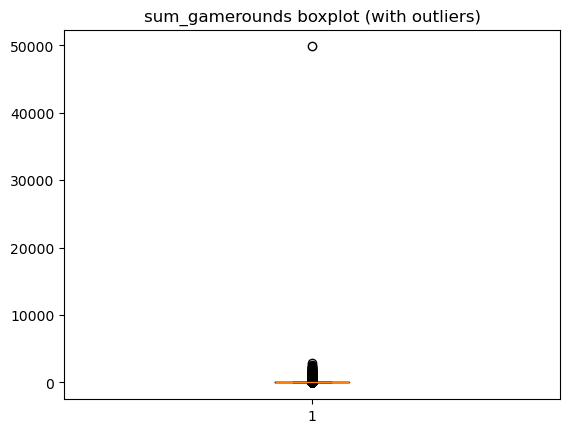

In [8]:
# Checking Outliers

print(df["sum_gamerounds"].describe())

plt.boxplot(df["sum_gamerounds"])
plt.title("sum_gamerounds boxplot (with outliers)")
plt.show()

In [9]:
# Handling Outliers with IQR Method

def determine_outlier_thresholds_iqr(df, col_name, th1=0.25, th3=0.75):
    quartile1 = df[col_name].quantile(th1)
    quartile3 = df[col_name].quantile(th3)
    iqr = quartile3 - quartile1
    upper_limit = quartile3 + 1.5 * iqr
    lower_limit = quartile1 - 1.5 * iqr
    return lower_limit, upper_limit

lower_limit, upper_limit = determine_outlier_thresholds_iqr(df,"sum_gamerounds")

new_df = df[df["sum_gamerounds"] <= upper_limit]

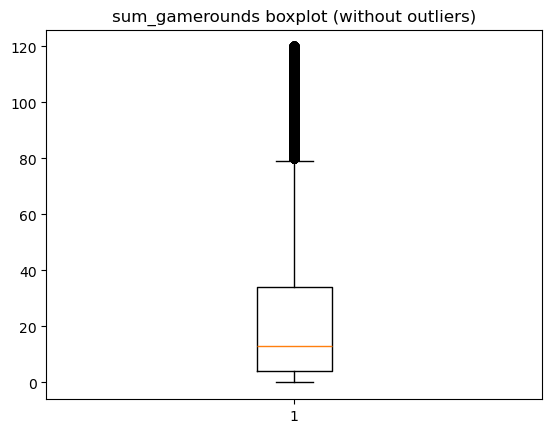

In [10]:
plt.boxplot(new_df["sum_gamerounds"])
plt.title("sum_gamerounds boxplot (without outliers)")
plt.show()

We can still observe outliers in the plot, but since these values are important for our problem, we keep them and proceed as they are.

## 4) Exploratory Data Analysis (EDA):

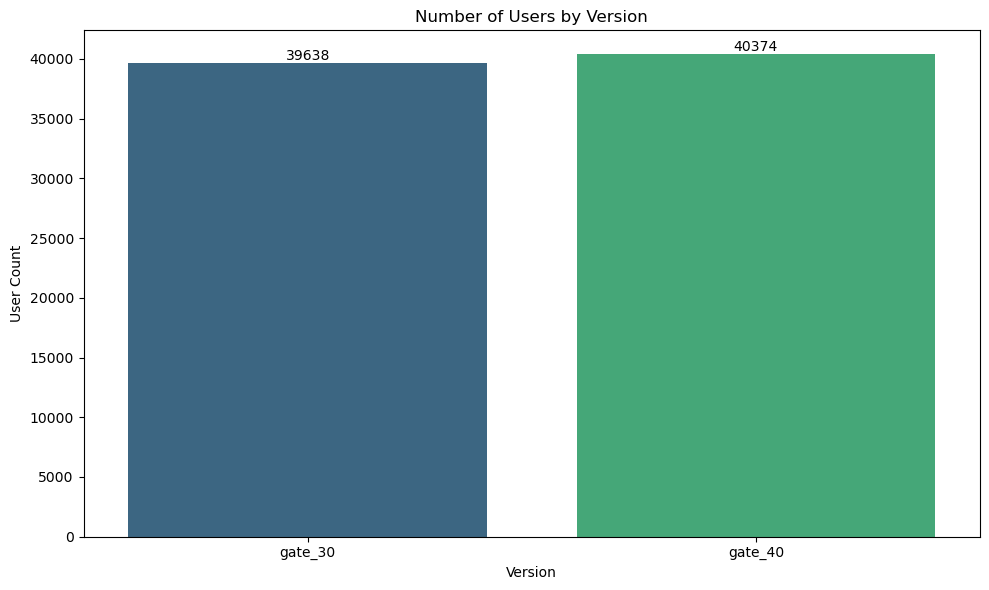

In [11]:
user_count_by_version = new_df.groupby("version")["userid"].count().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=user_count_by_version, x="version", y="userid", palette="viridis")

plt.title("Number of Users by Version")
plt.xlabel("Version")
plt.ylabel("User Count")

for index, row in user_count_by_version.iterrows():
    plt.text(index, row['userid'], row['userid'], ha='center', va='bottom')

plt.tight_layout()
plt.show()

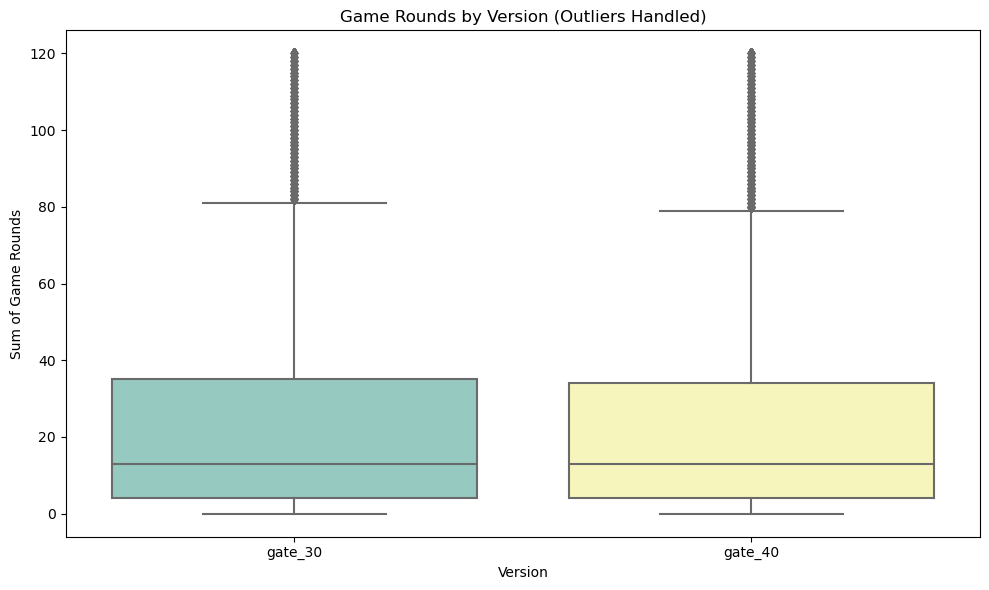

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=new_df, x="version", y="sum_gamerounds", palette="Set3")

plt.title("Game Rounds by Version (Outliers Handled)")
plt.xlabel("Version")
plt.ylabel("Sum of Game Rounds")

plt.tight_layout()
plt.show()

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


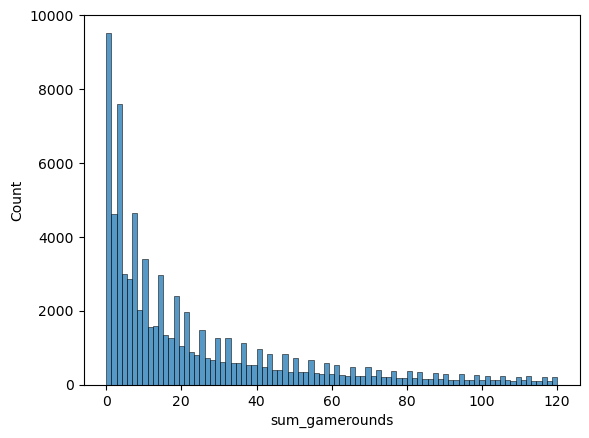

In [13]:
sns.histplot(new_df["sum_gamerounds"])
plt.show()

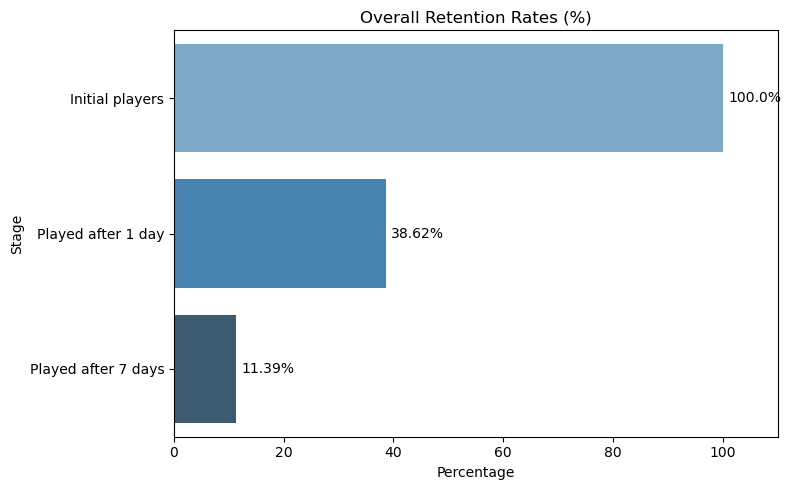

In [14]:
retention1_percent = np.round(new_df["retention_1"].mean() * 100, 2)
retention7_percent = np.round(new_df["retention_7"].mean() * 100, 2)

funnel_data = pd.DataFrame({
    "stage": ["Initial players", "Played after 1 day", "Played after 7 days"],
    "percentage": [100, retention1_percent, retention7_percent]
})

plt.figure(figsize=(8, 5))
sns.barplot(data=funnel_data, y="stage", x="percentage", palette="Blues_d")

for index, row in funnel_data.iterrows():
    plt.text(row["percentage"] + 1, index, f"{row['percentage']}%", va='center')

plt.title("Overall Retention Rates (%)")
plt.xlabel("Percentage")
plt.ylabel("Stage")

plt.xlim(0, 110)
plt.tight_layout()
plt.show()

In [15]:
df.groupby("version")[["retention_1", "retention_7"]].mean()

,retention_1,retention_7
version,,
gate_30,0.448188,0.190201
gate_40,0.442283,0.182000


## 5) A/B Testing

We have looked at the dataset in detail, applied the necessary preprocessing steps, and analyzed the main characteristics of the data using different visualizations. After this, we moved on to the hypothesis testing part, which is the main goal of this project.

In this project, we used two statistical tests. The first test compares the retention rates between the two versions to see if there is a meaningful difference in user loyalty. The second test looks at how the versions affect sum_gamerounds (the number of game rounds played) to understand how each version influences the players’ gaming experience.

#### 5.a) Proportion Z-Test:

In this test, our goal is to examine the users’ return rates to the app 1 day and 7 days after installation for each version and see if there is a significant difference between them. The test we chose for this is the Proportion Z Test. The Proportion Z Test compares the differences in proportions between two groups and evaluates whether the observed difference is statistically significant. This test is especially used for hypotheses based on proportions.

First, we defined our null and alternative hypotheses:

- H₀ (Null Hypothesis): There is no significant difference in retention rates between version A and version B.

- H₁ (Alternative Hypothesis): There is a significant difference in retention rates between version A and version B.

In [16]:
# Checking that the versions and retention columns are defined correctly

print(new_df["version"].unique())  # Should be 'gate_30' or 'gate_40'
print(new_df[["retention_1", "retention_7"]].head())  # Should contain True/False

['gate_30' 'gate_40']
   retention_1  retention_7
0        False        False
1         True        False
3        False        False
6        False        False
7        False        False


In [18]:
from statsmodels.stats.proportion import proportions_ztest

# Day 1

retention_1_counts = new_df.groupby("version")["retention_1"].sum()
retention_1_nobs = new_df.groupby("version")["retention_1"].count()
retention_1_rates = retention_1_counts / retention_1_nobs

# Day 7

retention_7_counts = new_df.groupby("version")["retention_7"].sum()
retention_7_nobs = new_df.groupby("version")["retention_7"].count()
retention_7_rates = retention_7_counts / retention_7_nobs

# 1. Gün Retention testi
counts_1 = retention_1_counts.values  # Number of True values
nobs_1 = retention_1_nobs.values  # Total number of users

z_stat_1, p_val_1 = proportions_ztest(count=counts_1, nobs=nobs_1)
print("Day 1 Retention Test")
print("Z Statistic:", z_stat_1)
print("p-value:", p_val_1)


# 7. Gün Retention testi
counts_7 = retention_7_counts.values  # Number of True values
nobs_7 = retention_7_nobs.values  # Total number of users

z_stat_7, p_val_7 = proportions_ztest(count=counts_7, nobs=nobs_7)
print("\nDay 7 Retention Test")
print("Z Statistic:", z_stat_7)
print("p-value:", p_val_7)

Day 1 Retention Test
Z Statistic: 1.6646506905825758
p-value: 0.09598246591228181

Day 7 Retention Test
Z Statistic: 3.7037892049869834
p-value: 0.00021240277684542175


Day 1 Retention Test:
Z statistic: 1.6647, p-value: 0.096

Since the p-value (0.096) is greater than 0.05, this result is not statistically significant. In other words, there is no significant difference in day 1 retention rates between versions A and B; both versions retain users at a statistically similar level.

Day 7 Retention Test:
Z statistic: 3.7038, p-value: 0.00021

Since the p-value (0.00021) is much smaller than 0.05, this result is statistically significant. This indicates that there is a significant difference in day 7 retention rates between versions A and B, with version B achieving higher retention compared to version A.

#### 5.b) Mann-Whitney U Test:

In this test, our goal is to examine whether there is a difference between groups A and B in terms of the number of game rounds played (sum_gamerounds). The test we chose for this is the Mann-Whitney U Test. The Mann-Whitney U Test is a non-parametric test used to compare the median differences between two independent groups and determine whether there is a statistically significant difference between them.

In [19]:
print(new_df.groupby("version").retention_1.mean())
print(new_df.groupby("version").retention_7.mean())

from scipy.stats import shapiro
import scipy.stats as stats

# Split A/B
group_A = new_df[new_df["version"] == "gate_30"]["sum_gamerounds"]
group_B = new_df[new_df["version"] == "gate_40"]["sum_gamerounds"]

# Normality test
stat_A, p_A = shapiro(group_A)
stat_B, p_B = shapiro(group_B)
alpha = 0.05
print(f"Group A: p-value={p_A}")
print(f"Group B: p-value={p_B}")

version
gate_30    0.389096
gate_40    0.383366
Name: retention_1, dtype: float64
version
gate_30    0.118119
gate_40    0.109798
Name: retention_7, dtype: float64
Group A: p-value=0.0
Group B: p-value=0.0


C:\Users\Dell\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [20]:
from scipy.stats import mannwhitneyu

# Apply Mann-Whitney U Test
stat, p_value = mannwhitneyu(group_A, group_B)

# Print the result
print("Mann-Whitney U test statistic:", stat)
print("p-value:", p_value)

# Add interpretation
if p_value < 0.05:
    print("Result: There is a statistically significant difference between groups A and B.")
else:
    print("Result: There is no significant difference between groups A and B.")

Mann-Whitney U test statistic: 806916458.0
p-value: 0.03885510150342266
Result: There is a statistically significant difference between groups A and B.


In [21]:
print("Group A mean:", group_A.mean(), " | Median:", group_A.median())
print("Group B mean:", group_B.mean(), " | Median:", group_B.median())

Group A mean: 23.945178868762298  | Median: 13.0
Group B mean: 24.012557586565613  | Median: 13.0


The medians are equal, and there is only a very small difference between the means. Although the difference is statistically significant, it is not practically important from a business perspective.

#### 5.c) Parametric Test with Variable Transformation:

Since the data distribution has an exponential structure, the analysis was initially performed using the Mann-Whitney U Test, a non-parametric method. However, as an alternative approach, a variable transformation (e.g., logarithmic transformation) was applied to normalize the distribution, and the analysis was repeated using a parametric test (independent samples t-test). This allowed for a comparative evaluation of how the same hypothesis behaves under different statistical approaches.

In [22]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

# Filter values greater than 0 (to avoid log(0) error)
new_df = new_df[new_df['sum_gamerounds'] > 0].copy()

# Define a transformer using np.log
log_transformer = FunctionTransformer(func=np.log, inverse_func=np.exp)

# Apply the transformation
log_transformed = log_transformer.transform(new_df[['sum_gamerounds']])

# Add as a new column
new_df['log_sum_gamerounds'] = log_transformed

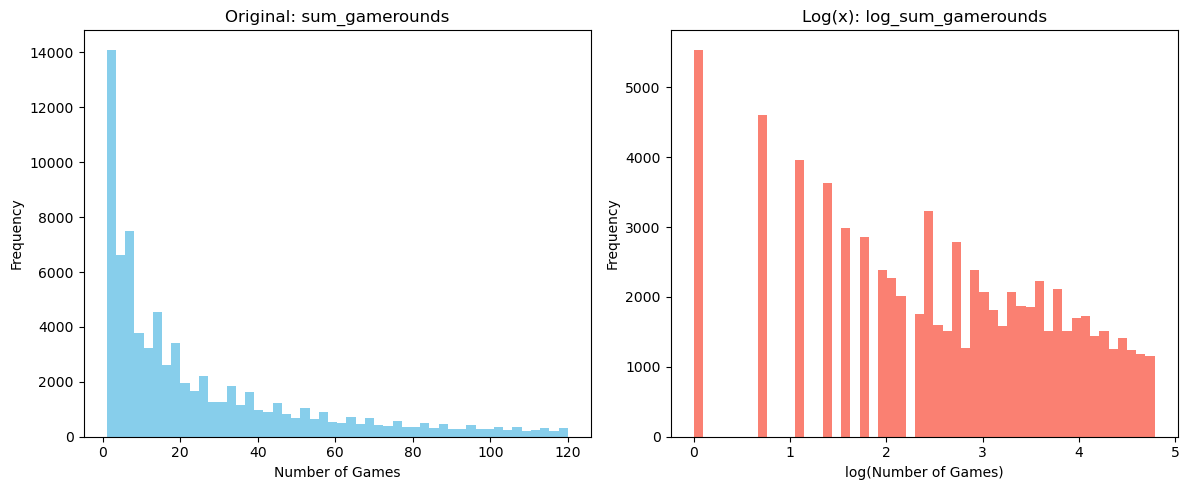

In [23]:
plt.figure(figsize=(12, 5))

# Original data histogram
plt.subplot(1, 2, 1)
plt.hist(new_df['sum_gamerounds'], bins=50, color='skyblue')
plt.title('Original: sum_gamerounds')
plt.xlabel('Number of Games')
plt.ylabel('Frequency')

# Log-transformed data histogram
plt.subplot(1, 2, 2)
plt.hist(new_df['log_sum_gamerounds'], bins=50, color='salmon')
plt.title('Log(x): log_sum_gamerounds')
plt.xlabel('log(Number of Games)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

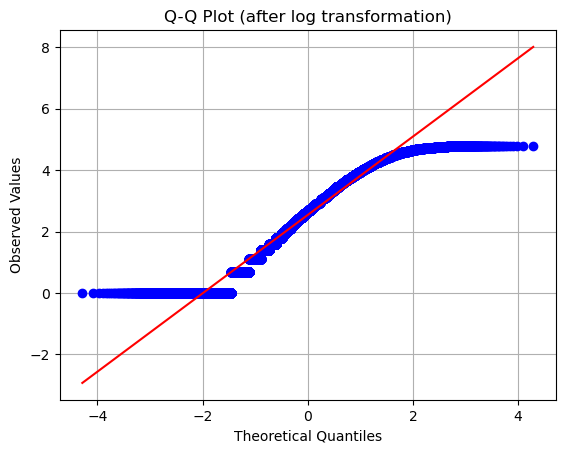

In [24]:
import scipy.stats as stats

# Q-Q plot
stats.probplot(new_df['log_sum_gamerounds'], dist="norm", plot=plt)
plt.title("Q-Q Plot (after log transformation)")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Observed Values")
plt.grid(True)
plt.show()

In [25]:
from scipy.stats import levene

# Check equality of variances using Levene's test
stat, p_value = levene(group_A, group_B)
print("Levene Test p-value:", p_value)

if p_value > 0.05:
    print("Variances are equal.")
    # Student's t-test (equal variances)
    from scipy.stats import ttest_ind
    t_stat, p_value = ttest_ind(group_A, group_B, equal_var=True)
    print(f"t-statistic: {t_stat}, p-value: {p_value}")
else:
    print("Variances are not equal.")
    # Welch's t-test (unequal variances)
    from scipy.stats import ttest_ind
    t_stat, p_value = ttest_ind(group_A, group_B, equal_var=False)
    print(f"Welch t-statistic: {t_stat}, p-value: {p_value}")

Levene Test p-value: 0.12082732122564133
Variances are equal.
t-statistic: -0.3467458127838215, p-value: 0.7287832012343212


There is no significant difference between the means of groups A and B. Since the p-value is 0.7288, we cannot find a statistically significant difference in performance between the two groups.

When the non-parametric test was applied, a statistically significant difference was detected between groups A and B. However, since the magnitude of this difference is very small, it was concluded that it does not have a meaningful impact from a business perspective. On the other hand, in the parametric test, no statistically significant difference was found due to the high p-value. This situation highlights how different statistical methods are sensitive to the data structure and distribution assumptions, emphasizing the importance of considering both statistical and practical significance when interpreting results.